In [1]:
from numpy.random.mtrand import rand
from agent import Agent
from maze import Maze
from policy import Policy

from util import plot_matrix, transform_policy_to_matrix_values

In [2]:
MAX_EPISODES = 100_000
THRESHOLD = 0.01
CONVERGED_THRESHOLD=1_000

In [3]:
maze = Maze(
    lenght=4,
    height=4,
    all_rewards=-1,
    special_rewards={
        (3, 0): 40,
        (2, 1): -10,
        (3, 1): -10,
        (0, 3): 10,
        (1, 3): -2},
    end_positions=[(3, 0), (0, 3)]
)

In [4]:
random_policy = Policy(lenght=4, height=4, greedy=False)
optimal_policy = Policy(lenght=4, height=4)

In [5]:
agent = Agent(maze, optimal_policy, (2, 3), 1)
agent.value_iteration()
agent.update_policy_to_deterministic()


Sweep 0: 
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Sweep 1: 
[[-1 -1 40  0]
 [-1 -1 -1 40]
 [10 -1 -1 -1]
 [ 0 10 -1 -1]]
Sweep 2: 
[[-2 39 40  0]
 [ 9 -2 39 40]
 [10  9 -2 30]
 [ 0 10  8 -2]]
Sweep 3: 
[[38 39 40  0]
 [ 9 38 39 40]
 [10  9 29 30]
 [ 0 10  8 29]]
Sweep 4: 
[[38 39 40  0]
 [37 38 39 40]
 [10 37 29 30]
 [ 0 10 28 29]]
Sweep 5: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 30]
 [ 0 36 28 29]]
Sweep 6: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 29]]
Sweep 7: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 34]]
Done after 7 sweeps!



In [6]:
agent.simulate()


Simulating agent starting on (2, 3)
Moving from (2, 3) to (2, 2) ↑
Moving from (2, 2) to (1, 2) ←
Moving from (1, 2) to (1, 1) ↑
Moving from (1, 1) to (1, 0) ↑
Moving from (1, 0) to (2, 0) →
Moving from (2, 0) to (3, 0) →
Finished simulation om (3, 0)



In [7]:
agent.visualize()


Values:         Policy:
 38 39 40  0    →  →  →  ⦾   
 37 38 39 40    ↑  ↑  ↑  ↑   
 36 37 36 35    ↑  ↑  ←  ←   
  0 36 35 34    ⦾  ↑  ↑  ←   



## First-visit Monte Carlo prediction
Policy: random<br>
discount: 1

In [8]:
agent.policy = random_policy
agent.discount = 1
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 53211 episodes.
[[-14.87168224 -11.28438136   1.35574363   0.        ]
 [-13.98512772 -16.41133645 -12.80527454  -4.32100535]
 [ -7.19597918 -13.97627301 -18.99529309 -18.74094105]
 [  0.          -8.69846605 -17.65558986 -20.17222019]]
[[-14.87168224 -11.28438136   1.35574363   0.        ]
 [-13.98512772 -16.41133645 -12.80527454  -4.32100535]
 [ -7.19597918 -13.97627301 -18.99529309 -18.74094105]
 [  0.          -8.69846605 -17.65558986 -20.17222019]]


## First-visit Monte Carlo prediction
Policy: random<br>
discount: 0.9

In [9]:
agent.discount = 0.9
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 15142 episodes.
[[-4.98184473 -2.98556431  6.56831133  0.        ]
 [-5.38984277 -7.55283083 -5.02319514  2.08568644]
 [-0.95642614 -5.56374513 -9.26018611 -8.7882125 ]
 [ 0.         -1.9608497  -7.38029098 -8.27780443]]
[[-4.98184473 -2.98556431  6.56831133  0.        ]
 [-5.38984277 -7.55283083 -5.02319514  2.08568644]
 [-0.95642614 -5.56374513 -9.26018611 -8.7882125 ]
 [ 0.         -1.9608497  -7.38029098 -8.27780443]]


## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 1

In [10]:
agent.policy = optimal_policy
agent.discount = 1
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 47 episodes.
[[38. 39. 40.  0.]
 [37. 38. 39. 40.]
 [36. 37. 36. 35.]
 [ 0. 36. 35. 34.]]
[[38. 39. 40.  0.]
 [37. 38. 39. 40.]
 [36. 37. 36. 35.]
 [ 0. 36. 35. 34.]]


## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 0.9

In [11]:
agent.discount = 0.9
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 31 episodes.
[[30.5     35.      40.       0.     ]
 [26.45    30.5     35.      40.     ]
 [22.805   26.45    22.805   19.5245 ]
 [ 0.      22.805   19.5245  16.57205]]
[[30.5     35.      40.       0.     ]
 [26.45    30.5     35.      40.     ]
 [22.805   26.45    22.805   19.5245 ]
 [ 0.      22.805   19.5245  16.57205]]


## Tabular TD
Policy: random<br>
discount: 1

In [12]:
agent.policy = random_policy
agent.discount = 1
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes
[[-10.42237782  -3.52406102  10.71277369   0.        ]
 [-11.34635619 -13.12529458  -4.93812999 -13.39905914]
 [ -4.25558562 -12.16940743 -17.58466489 -19.29317497]
 [  0.          -3.73195668 -15.87541258 -19.81555003]]


## Tabular TD
Policy: random<br>
discount: 0.9

In [13]:
agent.policy = random_policy
agent.discount = 0.9
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes
[[ -4.23109322  -2.49511753   6.87682142   0.        ]
 [ -5.42014728  -7.4549823   -2.7802511    5.81521025]
 [ -1.8301319   -6.82479651 -11.41689806 -11.59805369]
 [  0.          -0.88513475  -8.75122326 -10.50473432]]


## Tabular TD
Policy: optimal<br>
discount: 1

In [14]:
agent.policy = optimal_policy
agent.discount = 1
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1048 episodes.
[[38.         39.         40.          0.        ]
 [36.99999918 38.         38.99991679 39.99998255]
 [35.99943368 37.         36.         34.99999982]
 [ 0.         35.9999532  34.99999984 33.99987743]]


## Tabular TD
Policy: optimal<br>
discount: 0.9

In [15]:
agent.discount = 0.9
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1106 episodes.
[[30.5        35.         40.          0.        ]
 [26.44999988 30.5        34.99999716 39.99998255]
 [22.80494752 26.45       22.805      19.52449965]
 [ 0.         22.80497864 19.52449994 16.57182353]]


## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 1

In [16]:
agent.policy = random_policy
agent.policy.reset_policy()
agent.discount = 1
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


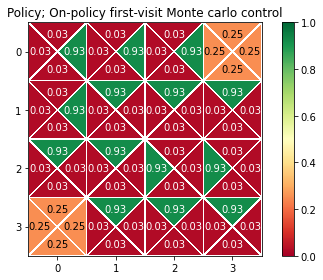

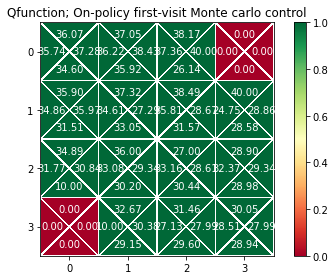

In [17]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; On-policy first-visit Monte carlo control')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; On-policy first-visit Monte carlo control')

## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 0.9

In [18]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


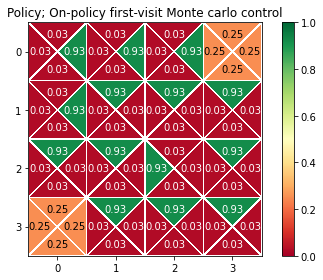

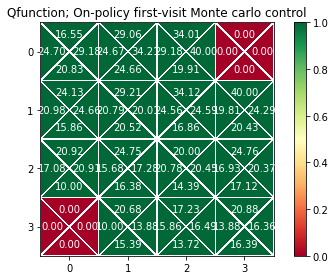

In [19]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; On-policy first-visit Monte carlo control')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; On-policy first-visit Monte carlo control')

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 1

In [20]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


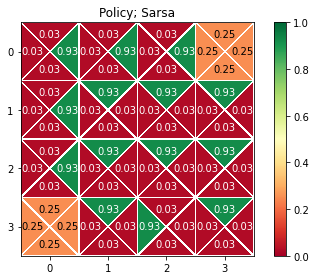

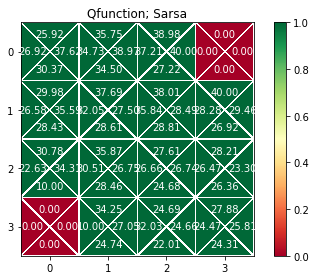

In [21]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Sarsa')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Sarsa')

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [22]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


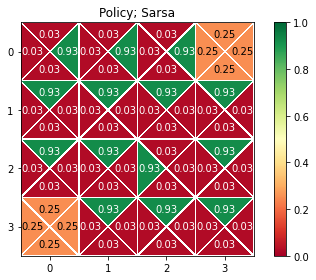

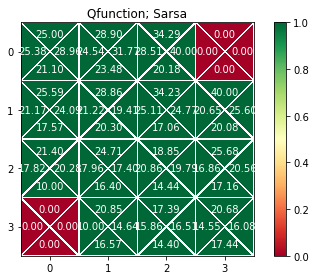

In [23]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Sarsa')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Sarsa')

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 1

In [24]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 38272 episodes.


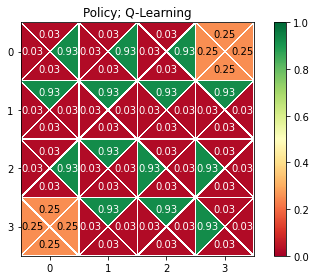

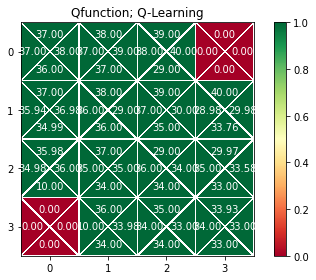

In [25]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Q-Learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Q-Learning')

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [26]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 34098 episodes.


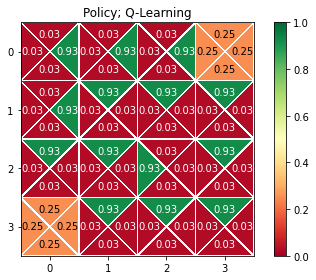

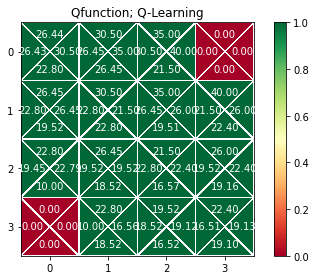

In [27]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Q-Learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Q-Learning')

## Double Q-learning
policy: derived from Q<br>
discount: 1

In [28]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 72862 episodes.


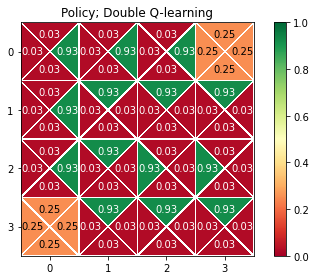

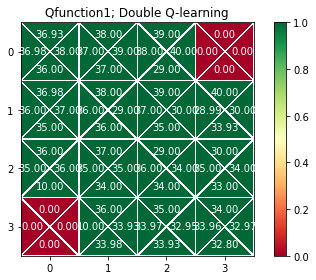

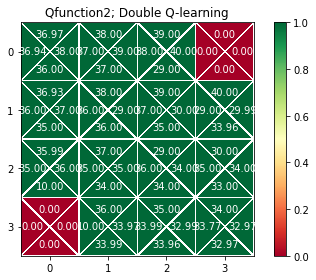

In [29]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]), 'Qfunction1; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]), 'Qfunction2; Double Q-learning')

## Double Q-learning
policy: derived from Q<br>
discount: 0.9

In [30]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 65420 episodes.


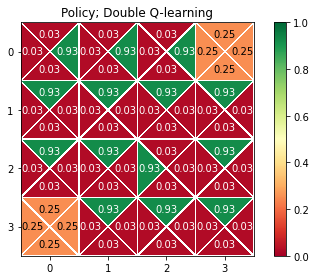

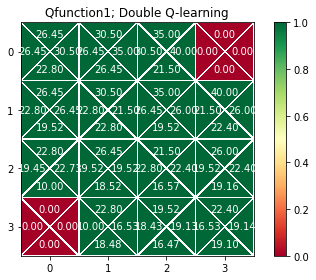

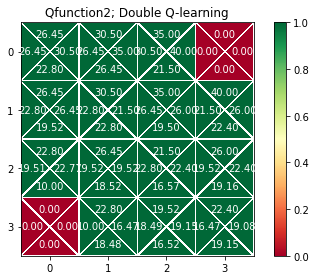

In [31]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]), 'Qfunction1; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]), 'Qfunction2; Double Q-learning')